In [1]:
# import libraries
import re
import sys
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
top_10_apps = df.sort_values(by='Installs', ascending=False).head(100)

# Display the top 10 apps
print(top_10_apps[['App', 'Installs','Category']])

                                                     App      Installs  \
10472            Life Made WI-Fi Touchscreen Photo Frame          Free   
420          UC Browser - Fast Download Private & Secure  500,000,000+   
474                          LINE: Free Calls & Messages  500,000,000+   
3767                        Flipboard: News For Our Time  500,000,000+   
3574                                         Cloud Print  500,000,000+   
...                                                  ...           ...   
505    Cougar Dating Life : Date Older Women Sugar Mummy      500,000+   
6983                      Best Friends Dress Up & Makeup      500,000+   
3135                            VZ Navigator for Tablets      500,000+   
507                                 Stranger Chat & Date      500,000+   
8134                                        Alzashop.com      500,000+   

                 Category  
10472                 1.9  
420         COMMUNICATION  
474         COMMUNICATION  

In [4]:
%matplotlib inline

In [5]:
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [6]:
# Look at first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

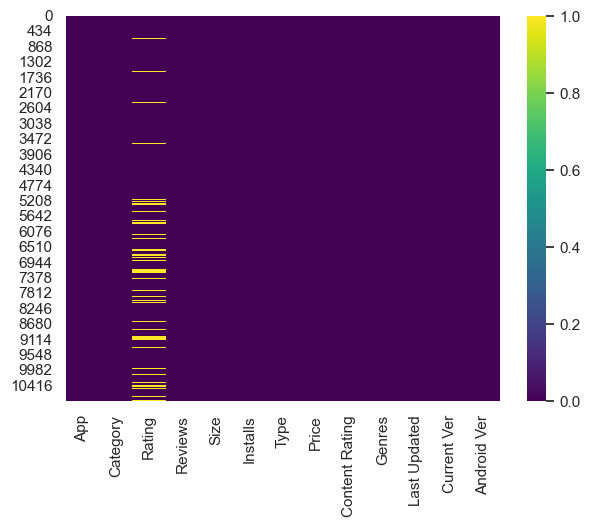

In [8]:
# Exploring missing data, checking to see if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [9]:
# Looks like there are missing values in "Rating", "Type", 
# "Content Rating" and " Android Ver" also has some missing values, but most of these missing values in Rating column.

In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
#There are two strategies to handle missing data, either removing records with these missing values or replacing 
#missing values with a specific value like (mean, median or mode) value of the column

# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [12]:
# Count number of unique values in category column 
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
# Check record  of unreasonable value which is 1.9
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [14]:
# Drop bad column
df = df.drop(i)

In [15]:
# Removing NaN values
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]

In [16]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Extract the year from the 'Last Updated' column
df['Year Updated'] = df['Last Updated'].dt.year

# Print the DataFrame with the new 'Year Updated' column
print(df[['App', 'Last Updated', 'Year Updated']])

                                                     App Last Updated  \
0         Photo Editor & Candy Camera & Grid & ScrapBook   2018-01-07   
1                                    Coloring book moana   2018-01-15   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...   2018-08-01   
3                                  Sketch - Draw & Paint   2018-06-08   
4                  Pixel Draw - Number Art Coloring Book   2018-06-20   
...                                                  ...          ...   
10836                                   Sya9a Maroc - FR   2017-07-25   
10837                   Fr. Mike Schmitz Audio Teachings   2018-07-06   
10838                             Parkinson Exercices FR   2017-01-20   
10839                      The SCP Foundation DB fr nn5n   2015-01-19   
10840      iHoroscope - 2018 Daily Horoscope & Astrology   2018-07-25   

       Year Updated  
0              2018  
1              2018  
2              2018  
3              2018  
4            

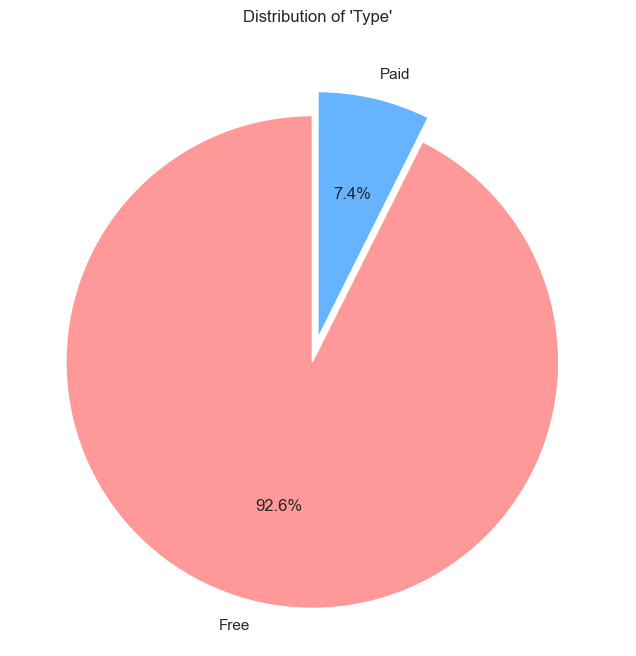

In [17]:
type_counts = df['Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
type_counts.plot.pie(
    autopct='%1.1f%%', 
    labels=type_counts.index, 
    colors=['#ff9999','#66b3ff'],  # Use distinguishable colors
    startangle=90,
    explode=(0.1, 0)  # Slightly "explode" the first slice for emphasis
)
plt.title("Distribution of 'Type'")
plt.ylabel("")  # Hide the y-axis label for clarity
plt.show()

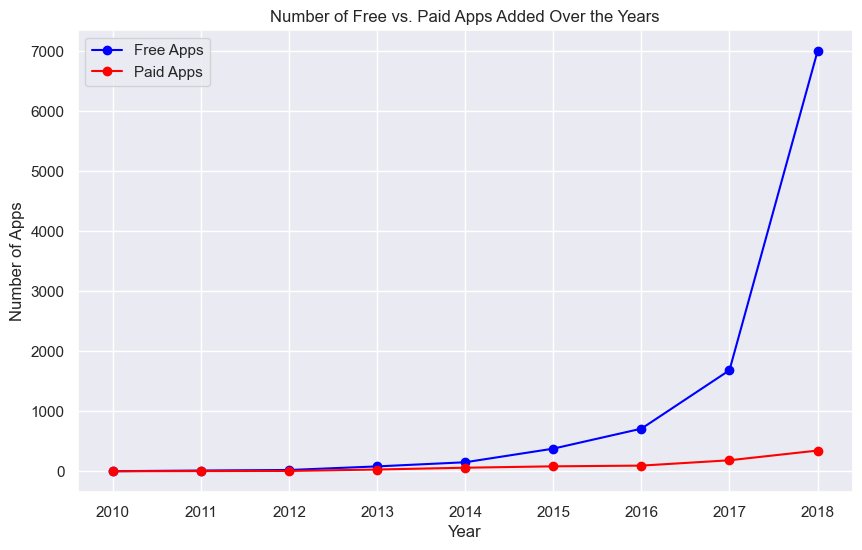

In [18]:
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Extract the year from the 'Last Updated' column
df['Year Updated'] = df['Last Updated'].dt.year

# Group by year and type, then count occurrences
yearly_counts = df.groupby(['Year Updated', 'Type']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10,6))

# Plot both 'Free' and 'Paid' apps
yearly_counts['Free'].plot(label='Free Apps', marker='o', color='blue')
yearly_counts['Paid'].plot(label='Paid Apps', marker='o', color='red')

# Adding titles and labels
plt.title('Number of Free vs. Paid Apps Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.legend()

# Display the plot
plt.show()

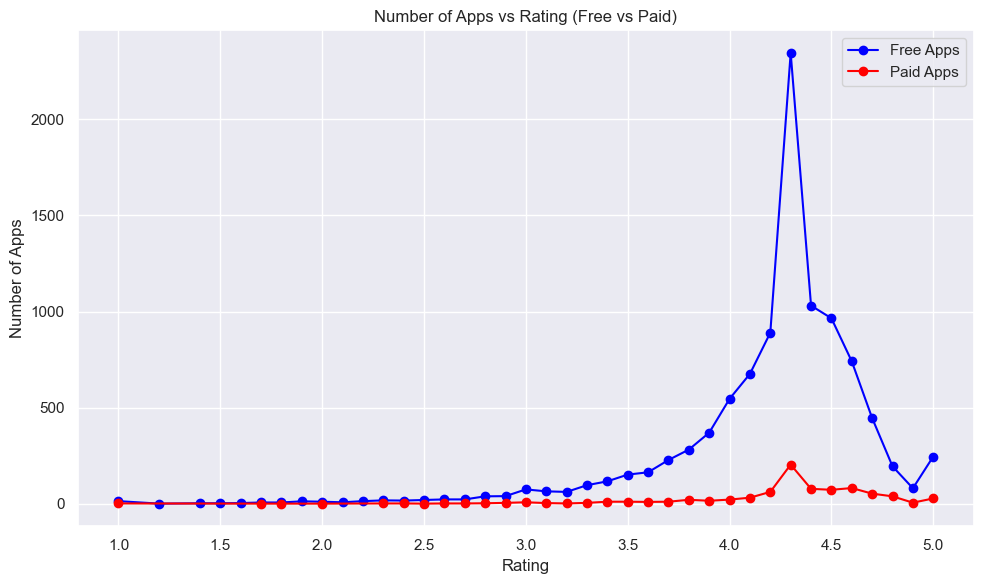

In [19]:

# Separate the data into Free and Paid Apps
df_free = df[df['Type'] == 'Free']
df_paid = df[df['Type'] == 'Paid']

# Count the number of apps per rating for Free Apps
free_rating_counts = df_free['Rating'].value_counts().sort_index()

# Count the number of apps per rating for Paid Apps
paid_rating_counts = df_paid['Rating'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10,6))

# Plot for Free Apps
plt.plot(free_rating_counts.index, free_rating_counts.values, label='Free Apps', marker='o', color='blue')

# Plot for Paid Apps
plt.plot(paid_rating_counts.index, paid_rating_counts.values, label='Paid Apps', marker='o', color='red')

# Adding titles and labels
plt.title('Number of Apps vs Rating (Free vs Paid)')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

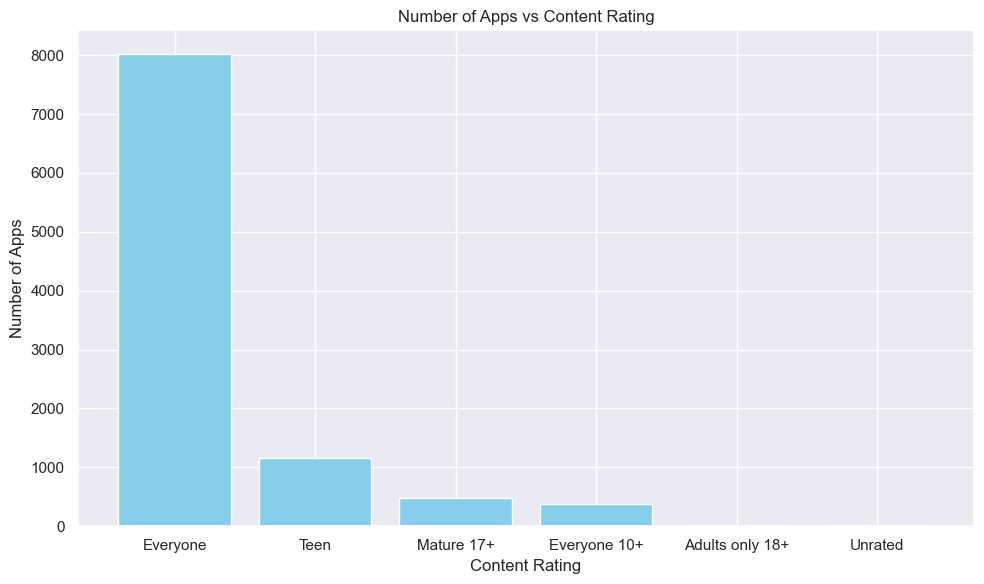

In [20]:


# Count the number of apps per content rating
content_rating_counts = df_free['Content Rating'].value_counts()

# Plotting
plt.figure(figsize=(10,6))

# Bar plot for the number of apps vs content rating
plt.bar(content_rating_counts.index, content_rating_counts.values, color='skyblue')

# Adding titles and labels
plt.title('Number of Apps vs Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')

# Display the plot
plt.tight_layout()
plt.show()

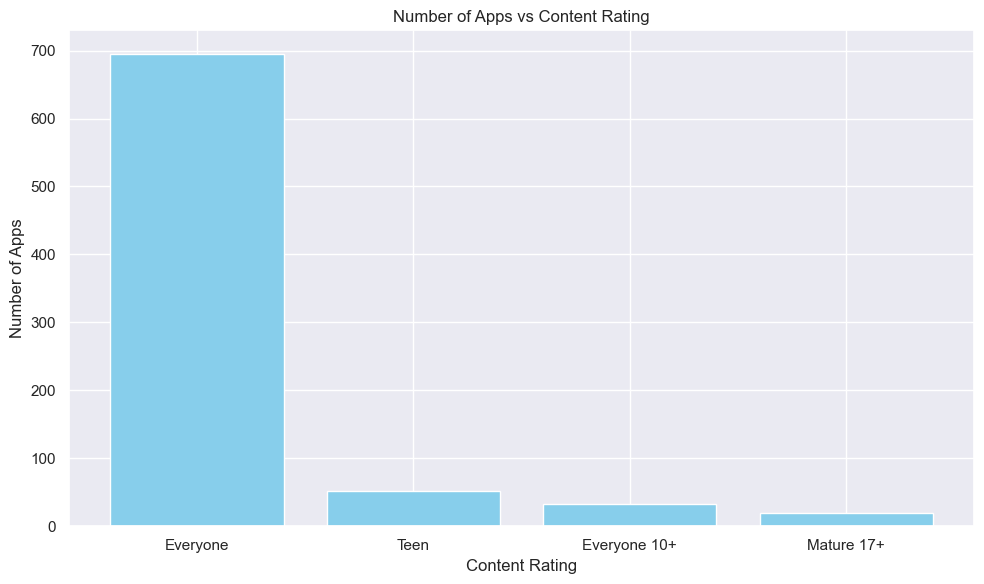

In [21]:


# Count the number of apps per content rating
content_rating_counts = df_paid['Content Rating'].value_counts()

# Plotting
plt.figure(figsize=(10,6))

# Bar plot for the number of apps vs content rating
plt.bar(content_rating_counts.index, content_rating_counts.values, color='skyblue')

# Adding titles and labels
plt.title('Number of Apps vs Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')

# Display the plot
plt.tight_layout()
plt.show()

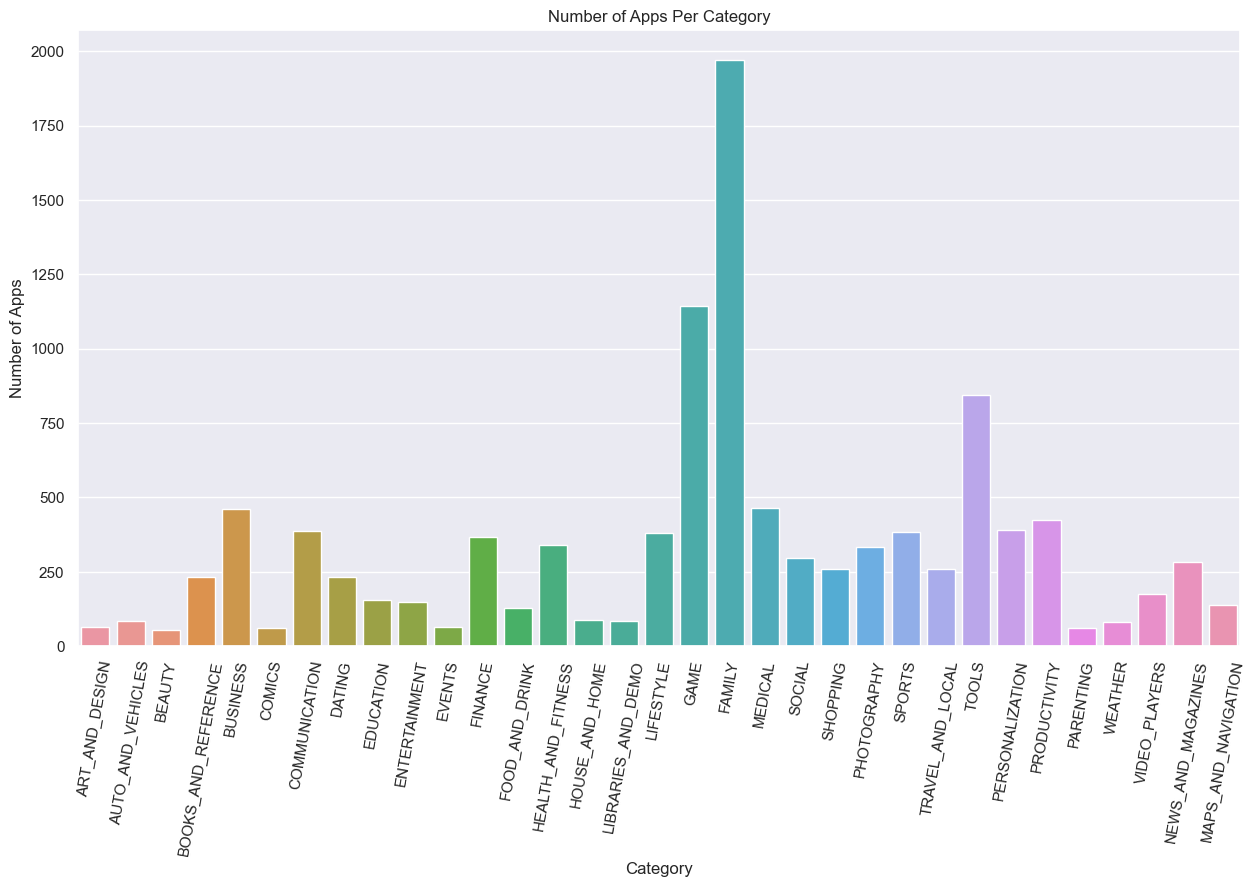

In [22]:

sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()

Solution of Business Objective# As per the above analysis FAMILY category has very much scope because it has all age group people. second category is GAME that has also scope.
Eventhough apps from the categories like FAMILY, SOCIAL, COMMUNICATION and ENTERTAINMENT of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion,we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

# Conclusion#
After analyzing the dataset we have got answers to some of the serious & interesting facts which any of the android users would love to know.

a) Top 10 Highest rating Apps in google play store in terms of categories

b) Number of Application in terms of Category

c) Top 10 apps which has more downloads

d) Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating.

e) Free and Paid Apps

f) Relation between app category and app price

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL and GAME like Instagram, Clash of Clans etc.

In [23]:

bm = df.sort_values('Installs',ascending=False)
More_downloads_App= bm.loc[:,['App','Installs']]
More_downloads_App.head(11)
     

,App,Installs
1661,Temple Run 2,"500,000,000+"
4039,Google Duo - High Quality Video Calls,"500,000,000+"
385,Viber Messenger,"500,000,000+"
3562,Google Calendar,"500,000,000+"
4048,Dropbox,"500,000,000+"
3569,Dropbox,"500,000,000+"
4041,Temple Run 2,"500,000,000+"
4122,LINE: Free Calls & Messages,"500,000,000+"
3574,Cloud Print,"500,000,000+"
3767,Flipboard: News For Our Time,"500,000,000+"


In [24]:

ab = df[df['Category'] == 'FAMILY']
bv = ab.sort_values(by=['Rating'], ascending=True)

Family_lowest_rating= bv.loc[:,['Category','Rating','App']]
Family_lowest_rating

,Category,Rating,App
4127,FAMILY,1.0,Speech Therapy: F
10324,FAMILY,1.0,FE Mechanical Engineering Prep
5978,FAMILY,1.0,Truck Driving Test Class 3 BC
4905,FAMILY,1.6,AC REMOTE UNIVERSAL-PRO
6135,FAMILY,1.7,BG TV App
...,...,...,...
6783,FAMILY,5.0,Wifi BT Scanner
6816,FAMILY,5.0,BU Study
6823,FAMILY,5.0,Barisal University App-BU Face
10416,FAMILY,5.0,FH School


In [25]:

hi = df[df['Category'] == 'FAMILY']
hig = hi.sort_values(by=['Rating'], ascending=False)

Family_highest_rating = hig.loc[:,['Category','Rating','App']]
Family_highest_rating.head(11)

,Category,Rating,App
10837,FAMILY,5.0,Fr. Mike Schmitz Audio Teachings
7865,FAMILY,5.0,CT Brain Interpretation
6364,FAMILY,5.0,BK Video Status
9705,FAMILY,5.0,EP Radio
6043,FAMILY,5.0,Exam Result BD
5996,FAMILY,5.0,Railroad Radio Vancouver BC
8861,FAMILY,5.0,WPBS-DT
8018,FAMILY,5.0,30WPM Amateur ham radio Koch CW Morse code tra...
8014,FAMILY,5.0,Morse Player
7842,FAMILY,5.0,CS & IT Interview Questions


In [26]:
# Clean and convert 'Installs' column to integers (remove commas and '+')
# df['Installs'] = df['Installs'].str.replace(',', '')  # Remove commas
# df['Installs'] = df['Installs'].str.replace('+', '')  # Remove plus signs
# df['Installs'] = pd.to_numeric(df['Installs'])  # Convert to numeric values

# Sort the DataFrame by 'Installs' in descending order and select the top 10 apps
top_10_apps = df.sort_values(by='Installs', ascending=False).head(100)

# Display the top 10 apps
print(top_10_apps[['App', 'Installs','Category']])

                                                  App      Installs  \
1661                                     Temple Run 2  500,000,000+   
4039            Google Duo - High Quality Video Calls  500,000,000+   
385                                   Viber Messenger  500,000,000+   
3562                                  Google Calendar  500,000,000+   
4048                                          Dropbox  500,000,000+   
...                                               ...           ...   
4496                             Q Cat Live Wallpaper      500,000+   
6936                                        Hitman GO      500,000+   
7027   UNICORN - Color By Number & Pixel Art Coloring      500,000+   
7007  Pixelmania - Color by number & create pixel art      500,000+   
853                                   Toca Life: City      500,000+   

             Category  
1661             GAME  
4039    COMMUNICATION  
385     COMMUNICATION  
3562     PRODUCTIVITY  
4048     PRODUCTIVITY  
...

In [27]:
# App values encoding
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [28]:
df['App']

0        6962
1        2632
2        8656
3        7827
4        7022
         ... 
10836    8173
10837    4609
10838    6891
10839    8394
10840    9486
Name: App, Length: 10840, dtype: int32

In [29]:
# Category features encoding
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [30]:
len(category_list)

33

In [31]:
# Genres features encoding
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [32]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [33]:
df['Content Rating']

0        1
1        1
2        1
3        4
4        1
        ..
10836    1
10837    1
10838    1
10839    3
10840    1
Name: Content Rating, Length: 10840, dtype: int32

In [34]:
# Price cleaning
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [35]:
# Installs cleaning
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [36]:
# Type encoding
#df['Type'] = pd.get_dummies(df['Type'])

df = pd.get_dummies(df, columns=['Type'], prefix='Type')


In [37]:
df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,...,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Type_Free,Type_Paid
0,6962,ART_AND_DESIGN,4.1,159,19M,10000,0,1,9,2018-01-07,...,0,0,0,0,0,0,0,0,1,0
1,2632,ART_AND_DESIGN,3.9,967,14M,500000,0,1,12,2018-01-15,...,0,0,0,0,0,0,0,0,1,0
2,8656,ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,1,9,2018-08-01,...,0,0,0,0,0,0,0,0,1,0
3,7827,ART_AND_DESIGN,4.5,215644,25M,50000000,0,4,9,2018-06-08,...,0,0,0,0,0,0,0,0,1,0
4,7022,ART_AND_DESIGN,4.3,967,2.8M,100000,0,1,11,2018-06-20,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,8173,FAMILY,4.5,38,53M,5000,0,1,39,2017-07-25,...,0,0,0,0,0,0,0,0,1,0
10837,4609,FAMILY,5.0,4,3.6M,100,0,1,39,2018-07-06,...,0,0,0,0,0,0,0,0,1,0
10838,6891,MEDICAL,4.3,3,9.5M,1000,0,1,71,2017-01-20,...,0,0,0,0,0,0,0,0,1,0
10839,8394,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,0,3,19,2015-01-19,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# # Last Updated encoding
# df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [39]:
# Convert kbytes to mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [40]:
# Size cleaning
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [41]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Type_Free','Type_Paid' , 'Price', 'Content Rating', 'Genres', 'Current Ver']
features.extend(category_list)
X = df[features]
y = df['Rating']

In [42]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    0.0
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [43]:
# Split the dataset into 75% train data and 25% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [54]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [55]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [56]:
y_test

212      4.1
6547     4.4
2378     4.5
5744     4.2
3793     4.2
        ... 
6938     4.3
2779     4.1
2208     0.0
10244    4.4
2143     4.4
Name: Rating, Length: 2710, dtype: float64

In [57]:
y_train

10802    4.0
2943     0.0
8547     4.1
3247     3.1
2755     4.5
        ... 
9372     3.8
7291     5.0
1344     4.6
7293     4.3
1289     0.0
Name: Rating, Length: 8130, dtype: float64

In [58]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.73%'

In [90]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train a decision tree regressor model
model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 86.28%'

In [64]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from scipy import stats
plt.style.use("ggplot")
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import warnings
warnings.filterwarnings('ignore')

In [65]:
dataf = pd.read_csv('googleplaystore.csv') # read the data

In [ ]:
dataf["Size"] = df["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') 
                              if "Varies with device" in str(x) else x)
dataf["Size"] = df["Size"].apply(lambda x: str(x).replace('M','') 
                              if 'M' in str(x) else x)
dataf["Size"] = df["Size"].apply(lambda x: str(x).replace(',','') 
                              if ',' in str(x) else x)
dataf['Size'] = df['Size'].apply(lambda x: str(x).replace('+', '') 
                              if '+' in str(x) else x)
dataf['Size'] = df["Size"].apply(lambda x: float(str(x).replace('k',''))/1024 
                              if 'k' in str(x) else x)

In [ ]:
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('Free', 'NaN') if 'Free' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('Paid', 'NaN') if 'Paid' in x else x)

In [ ]:
dataf["Price"] = dataf["Price"].apply(lambda x: str(x).replace('$','') if '$' in x else x)

In [ ]:
dataf = dataf.dropna()

In [ ]:
dataf['Size'] = dataf['Size'].apply(lambda x:float(x))
dataf['Installs'] = dataf['Installs'].apply(lambda x:int(x))
dataf['Reviews'] = dataf['Reviews'].apply(lambda x:int(x))
dataf['Price'] = dataf['Price'].apply(lambda x:float(x))
dataf = dataf.dropna()

In [ ]:
data = dataf[['Rating', 'Size', 'Installs', 'Reviews', 'Price']]

In [ ]:
def mean_norm(x):
    x = np.array(x)
    x = (x - np.mean(x))/np.std(x)
    return x

In [ ]:
data['Rating'] = mean_norm(data['Rating'])
data['Size'] = mean_norm(data['Size'])
data['Installs'] = mean_norm(data['Installs'])
data['Reviews'] = mean_norm(data['Reviews'])
data['Price'] = mean_norm(data['Price'])
result = data

In [ ]:
data = np.array(data)
print(data[0:5])

In [ ]:
def input_fn():
    return tf.data.Dataset.from_tensors(tf.convert_to_tensor(data, dtype=tf.float32)).repeat(1)

In [ ]:
x = input_fn()
print(x)